In [150]:
import osmnx as ox
import networkx as nx
from matplotlib import pyplot as plt
import math
import utm

In [159]:
G = ox.graph_from_place('Boston, Massachusetts, USA', network_type='drive')

In [3]:
graph_project = ox.project_graph(G)
ox.project_

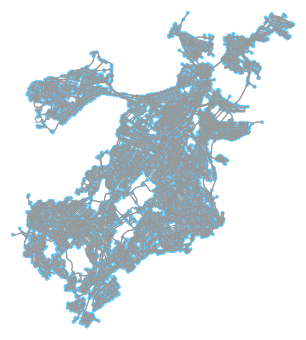

(<matplotlib.figure.Figure at 0x128b76c18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127d98470>)

In [4]:
ox.plot_graph(graph_project)

In [173]:
orig_xy = (42.367027, -71.062034)
target_xy = (42.363128, -71.05817)

In [174]:
proj_orig_xy = utm.from_latlon(orig_xy[0], orig_xy[1])
proj_target_xy = utm.from_latlon(target_xy[0], target_xy[1])
input_orig_xy = (proj_orig_xy[1], proj_orig_xy[0])
input_target_xy = (proj_target_xy[1], proj_target_xy[0])
print(input_orig_xy, input_target_xy)

(4692587.50864284, 330208.6704979583) (4692146.84060489, 330516.3668618748)


In [175]:
orig_node = ox.get_nearest_node(graph_project, input_orig_xy, return_dist=True, method='euclidean')
print(orig_node)

(61487478, 97.546114514119722)


In [176]:
target_node = ox.get_nearest_node(graph_project, input_target_xy, return_dist=True, method='euclidean')
print(target_node)

(621510944, 34.258452783442237)


In [177]:
route = nx.shortest_path(G=G, source=orig_node[0], target=target_node[0], weight='length')
print(route)

[61487478, 61357894, 61350635, 61350637, 61445832, 661035203, 61473920, 61473806, 621510944]


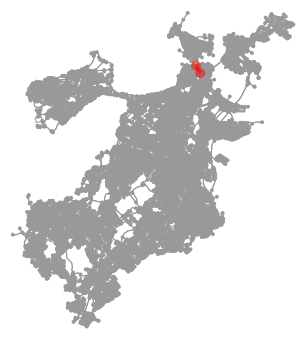

In [178]:
fig,ax = ox.plot_graph_route(graph_project, route)
plt.tight_layout()

In [157]:
G = ox.graph_from_point((42.367027, -71.062034), distance=750, network_type='all')

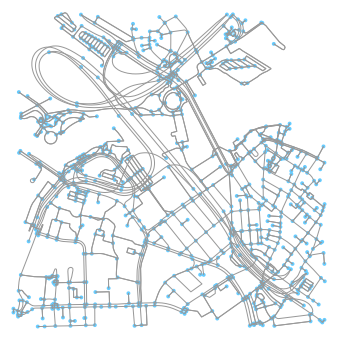

(<matplotlib.figure.Figure at 0x13a9795f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13a979da0>)

In [158]:
ox.plot_graph(G)